### Library yang digunakan
1. `pd`: Alias untuk pandas, digunakan untuk memudahkan
penulisan.
2. `np`: Alias untuk numpy.
3. `plt`: Alias untuk matplotlib.pyplot, digunakan untuk membuat grafik.
4. `sns`: Alias untuk seaborn, digunakan untuk visualisasi data yang lebih kompleks.
5. `train_test_split`: Fungsi dari `sklearn.model_selection` untuk membagi dataset menjadi data pelatihan dan pengujian.
6. `RandomForestRegressor`: Kelas dari sklearn.ensemble yang digunakan untuk regresi dengan algoritma Random Forest.
7. mean_squared_error, r2_score: Fungsi dari `sklearn.metrics` untuk mengevaluasi performa model regresi.
8. `StandardScaler`: Kelas dari `sklearn.preprocessing` untuk melakukan normalisasi atau standardisasi data.
9. `LinearRegression`: Kelas dari `sklearn.linear_model` untuk model regresi linier.

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


### Import Data

1. **Memuat Data**: `train_df` dan `test_df` memuat dataset pelatihan dan pengujian dari file CSV. Ini adalah langkah awal yang penting untuk mempersiapkan data sebelum analisis dan pemodelan.
  
2. **Menetapkan DataFrame Utama**: `df = train_df` menetapkan dataset pelatihan sebagai DataFrame utama untuk analisis lebih lanjut.

3. **Menampilkan Informasi Dataset**: Baris `print()` memberikan informasi tentang ukuran dataset, yang penting untuk memahami seberapa banyak data yang tersedia untuk pelatihan dan pengujian model.

4. **Menampilkan Beberapa Baris Pertama**: `df.head()` memberikan gambaran awal tentang struktur data, yang membantu dalam eksplorasi dan pembersihan data sebelum membangun model machine learning.

Mempersiapkan data sebelum melanjutkan ke tahap eksplorasi, pembersihan, dan pemodelan.

In [3]:
# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df = train_df

print(f"Train dataset contains {len(train_df)} rows")
print(f"Test dataset contains {len(test_df)} rows")
print(f"Total dataset contains {len(train_df) + len(test_df)} rows")
df.head()

Train dataset contains 1460 rows
Test dataset contains 1459 rows
Total dataset contains 1460 rows


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### EDA Singkat

- **`df.info()`**:
  - Fungsi ini memberikan ringkasan informasi tentang DataFrame, termasuk jumlah total baris, jumlah non-null (tidak kosong) untuk setiap kolom, tipe data dari setiap kolom, dan penggunaan memori. Ini membantu dalam memahami struktur data dan mengidentifikasi kolom yang mungkin memiliki nilai yang hilang.

- **`df.describe()`**:
  - Fungsi ini menghasilkan statistik deskriptif untuk kolom numerik dalam DataFrame, seperti count (jumlah), mean (rata-rata), std (deviasi standar), min (nilai minimum), 25th percentile, median (50th percentile), 75th percentile, dan max (nilai maksimum). Ini memberikan gambaran umum tentang distribusi dan rentang nilai dalam dataset, yang penting untuk analisis lebih lanjut dan pemodelan.

Kedua fungsi ini adalah langkah awal yang penting dalam EDA, membantu Anda memahami data yang Anda miliki sebelum melakukan pembersihan atau pemodelan lebih lanjut.

In [4]:
# Basic EDA
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Visualisasi Missing data

1. **Identifikasi Missing Data**:
   - `missing = df.isnull().sum()`: Menghitung jumlah nilai yang hilang (null) untuk setiap kolom dalam DataFrame `df`. Fungsi `isnull()` mengembalikan DataFrame boolean yang menunjukkan apakah setiap elemen adalah null, dan `sum()` menghitung jumlah nilai null per kolom.
   - `missing = missing[missing > 0]`: Menyaring hasil untuk hanya menyertakan kolom yang memiliki nilai hilang (jumlah lebih dari 0).


---
Kode ini bertujuan untuk mengidentifikasi dan memvisualisasikan pola nilai yang hilang dalam dataset. Dengan menggunakan heatmap, Anda dapat dengan cepat melihat kolom mana yang memiliki nilai hilang dan seberapa banyak, yang sangat penting untuk langkah-langkah pembersihan data selanjutnya sebelum membangun model machine learning.

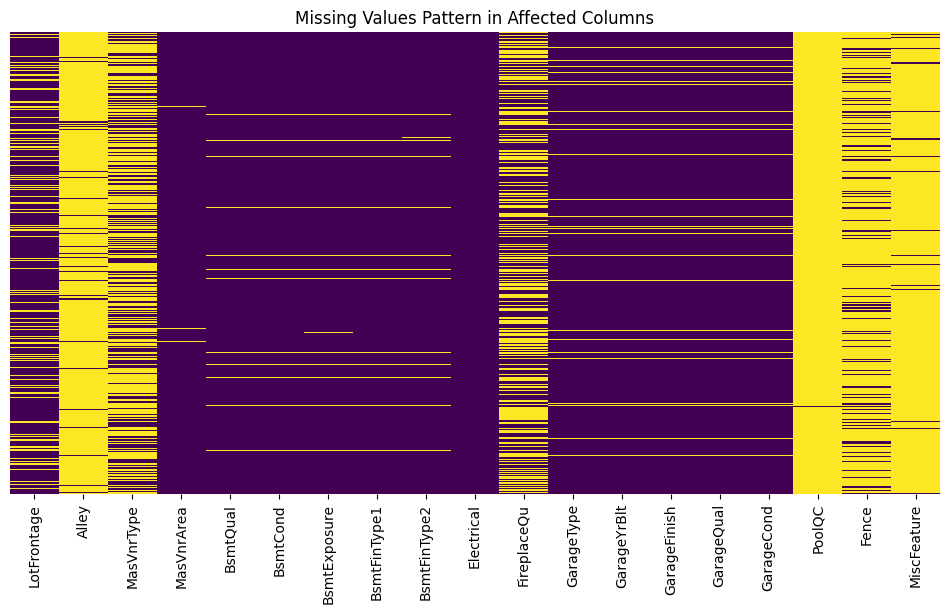

Missing value counts:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [5]:
# Menunjukkan missing data menggunakan heatmap
missing = df.isnull().sum()
missing = missing[missing > 0]

plt.figure(figsize=(12, 6))
sns.heatmap(df[missing.index].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Pattern in Affected Columns')
plt.show()

# Menunjukkan angka jumlah missing data pada tiap kolom
missing = missing.sort_values(ascending=False)
print("Missing value counts:")
print(missing)

### Visualisasi Distribusi Variabel
1. Membuat Figure:
  - `plt.figure(figsize=(10,6))`: Mengatur ukuran figure untuk visualisasi. Dalam hal ini, figure akan memiliki lebar 10 inci dan tinggi 6 inci, yang memberikan ruang yang cukup untuk menampilkan histogram dengan jelas.
2. Visualisasi Distribusi:
  - `sns.histplot(df['SalePrice'], kde=True)`: Menggunakan Seaborn untuk membuat histogram dari kolom `SalePrice`, yang merupakan variabel target dalam dataset.
    - `histplot` digunakan untuk menampilkan frekuensi nilai dalam bentuk histogram.
    - `kde=True` menambahkan kurva kepadatan (Kernel Density Estimate) di atas histogram, yang memberikan gambaran lebih halus tentang distribusi data. Kurva ini membantu dalam memahami pola distribusi dan mengidentifikasi apakah data terdistribusi normal atau tidak.

---
Kode ini bertujuan untuk memvisualisasikan distribusi variabel target SalePrice dalam dataset. Dengan menggunakan histogram dan kurva kepadatan, Anda dapat dengan mudah mengidentifikasi pola distribusi, seperti apakah harga jual terdistribusi normal, skewed (miring), atau memiliki outlier. Ini adalah langkah penting dalam analisis data sebelum membangun model machine learning, karena pemahaman tentang distribusi target dapat mempengaruhi pemilihan algoritma dan teknik pemodelan yang tepat.

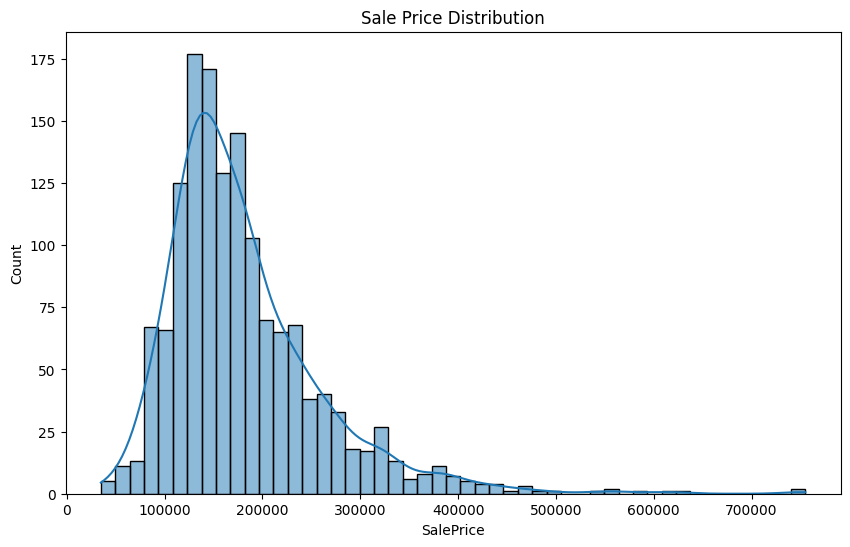

In [6]:
# Target variable distribution
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Sale Price Distribution')
plt.show()

### Visualisasi Korelasi tiap Fitur dengan `SalePrice`

1. **Memilih Kolom Numerik**:
   - `numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns`: Menggunakan `select_dtypes()` untuk memilih kolom-kolom dalam DataFrame `df` yang memiliki tipe data numerik (integer dan float). Variabel `numerical_cols` akan berisi nama-nama kolom tersebut.

2. **Membuat Matriks Korelasi**:
   - `corr = df[numerical_cols].corr()`: Menghitung matriks korelasi untuk kolom-kolom numerik yang telah dipilih. Fungsi `corr()` mengembalikan DataFrame yang menunjukkan koefisien korelasi Pearson antara setiap pasangan kolom numerik. Nilai korelasi berkisar antara -1 hingga 1, di mana 1 menunjukkan korelasi positif sempurna, -1 menunjukkan korelasi negatif sempurna, dan 0 menunjukkan tidak ada korelasi.


---

Kode ini bertujuan untuk menganalisis dan memvisualisasikan korelasi antara variabel numerik dalam dataset dan variabel target `SalePrice`. Dengan menggunakan matriks korelasi dan heatmap, Anda dapat dengan cepat mengidentifikasi variabel mana yang memiliki hubungan kuat (positif atau negatif) dengan harga jual, yang dapat membantu dalam pemilihan fitur untuk model machine learning dan memberikan wawasan tentang faktor-faktor yang mempengaruhi harga jual.

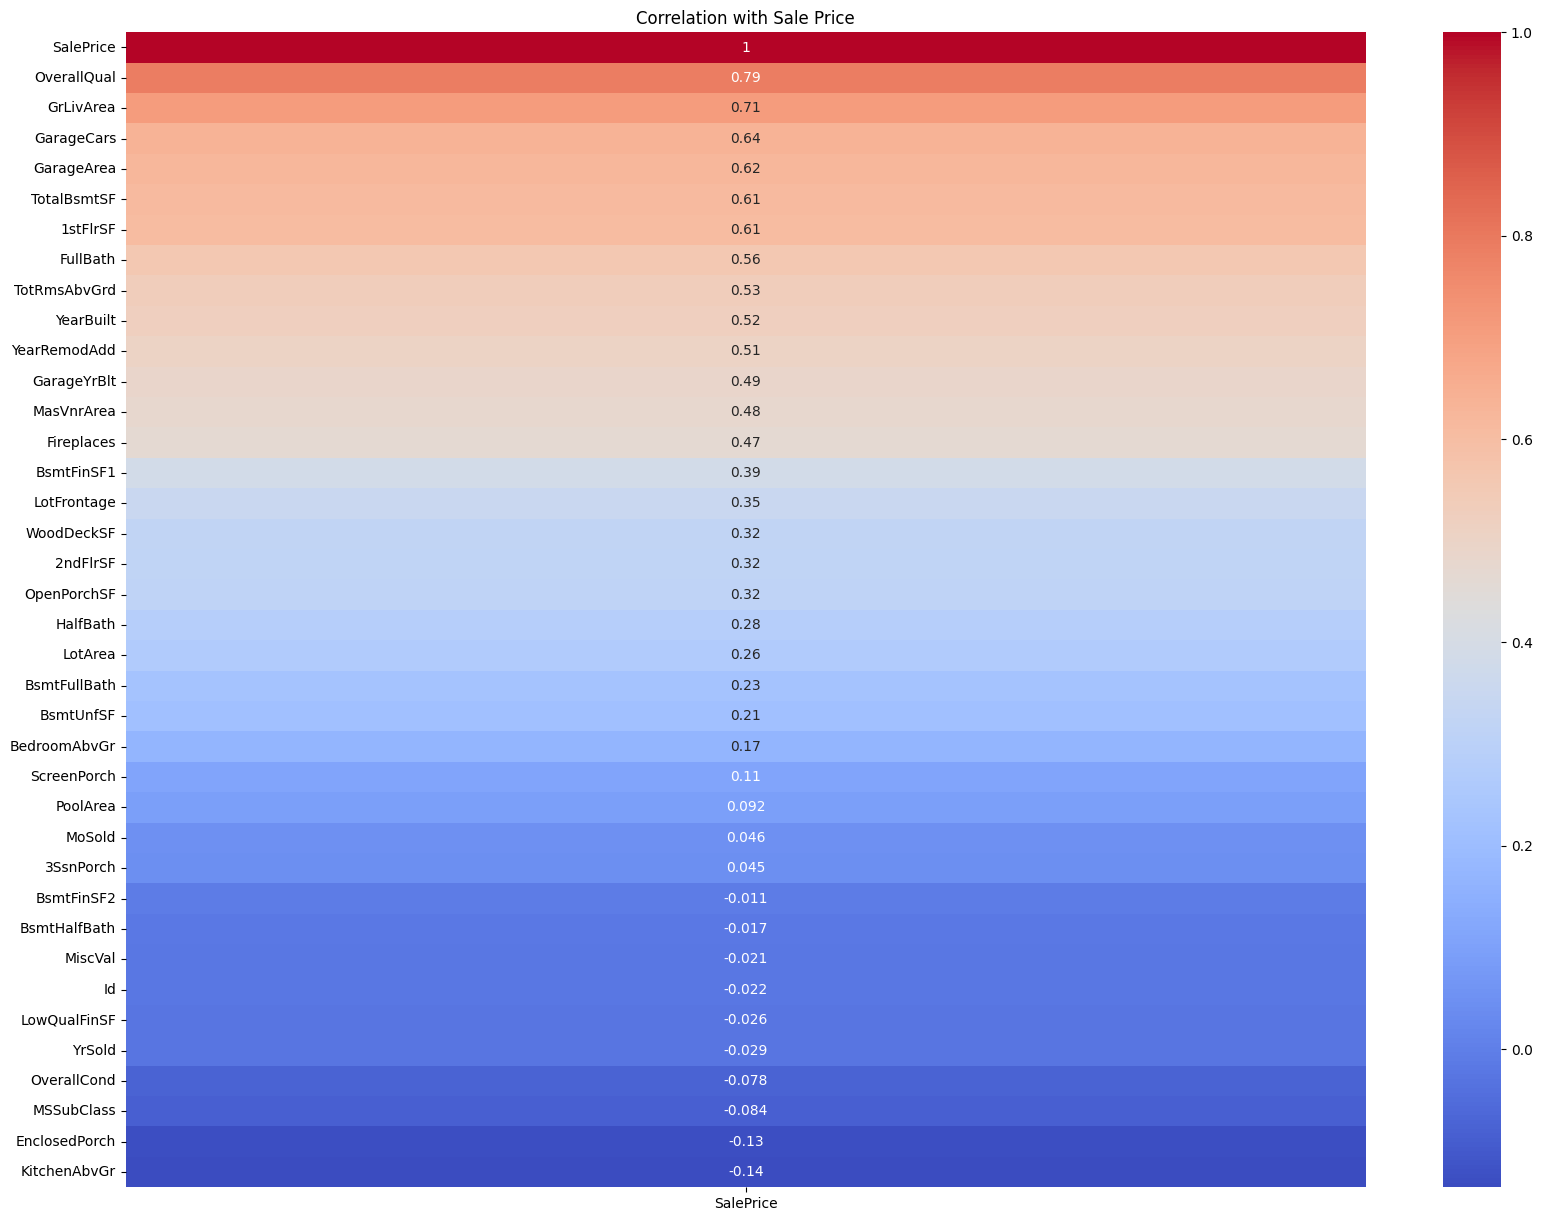

In [7]:
# Matrix korelasi
# Memilah kolom yang hanya memiliki tipe data numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Membuat matriks korelasi
corr = df[numerical_cols].corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Correlation with Sale Price')
plt.show()

### Visualisasi Fitur Penting

1. **Pembuatan Fitur Baru**:
   - `df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']`: Membuat fitur baru bernama `TotalSF` yang merupakan total luas bangunan, dihitung dari luas basement, lantai pertama, dan lantai kedua. Fitur ini dapat memberikan informasi penting tentang ukuran rumah.
   - `df['HouseAge'] = df['YrSold'] - df['YearBuilt']`: Membuat fitur `HouseAge` yang menghitung usia rumah berdasarkan tahun penjualan (`YrSold`) dikurangi tahun dibangun (`YearBuilt`). Ini membantu dalam memahami bagaimana usia rumah mempengaruhi harga jual.
   - `df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']`: Membuat fitur `RemodAge` yang menghitung usia renovasi rumah, yaitu selisih antara tahun penjualan dan tahun renovasi terakhir. Fitur ini dapat memberikan wawasan tentang dampak renovasi terhadap harga jual.

---

Kode ini bertujuan untuk meningkatkan dataset dengan menambahkan fitur baru yang relevan dan kemudian memvisualisasikan hubungan antara fitur-fitur tersebut dan variabel target `SalePrice`. Dengan melakukan ini, Anda dapat mengidentifikasi pola dan hubungan yang mungkin ada, yang dapat membantu dalam pemodelan machine learning dan memberikan wawasan tentang faktor-faktor yang mempengaruhi harga jual rumah.

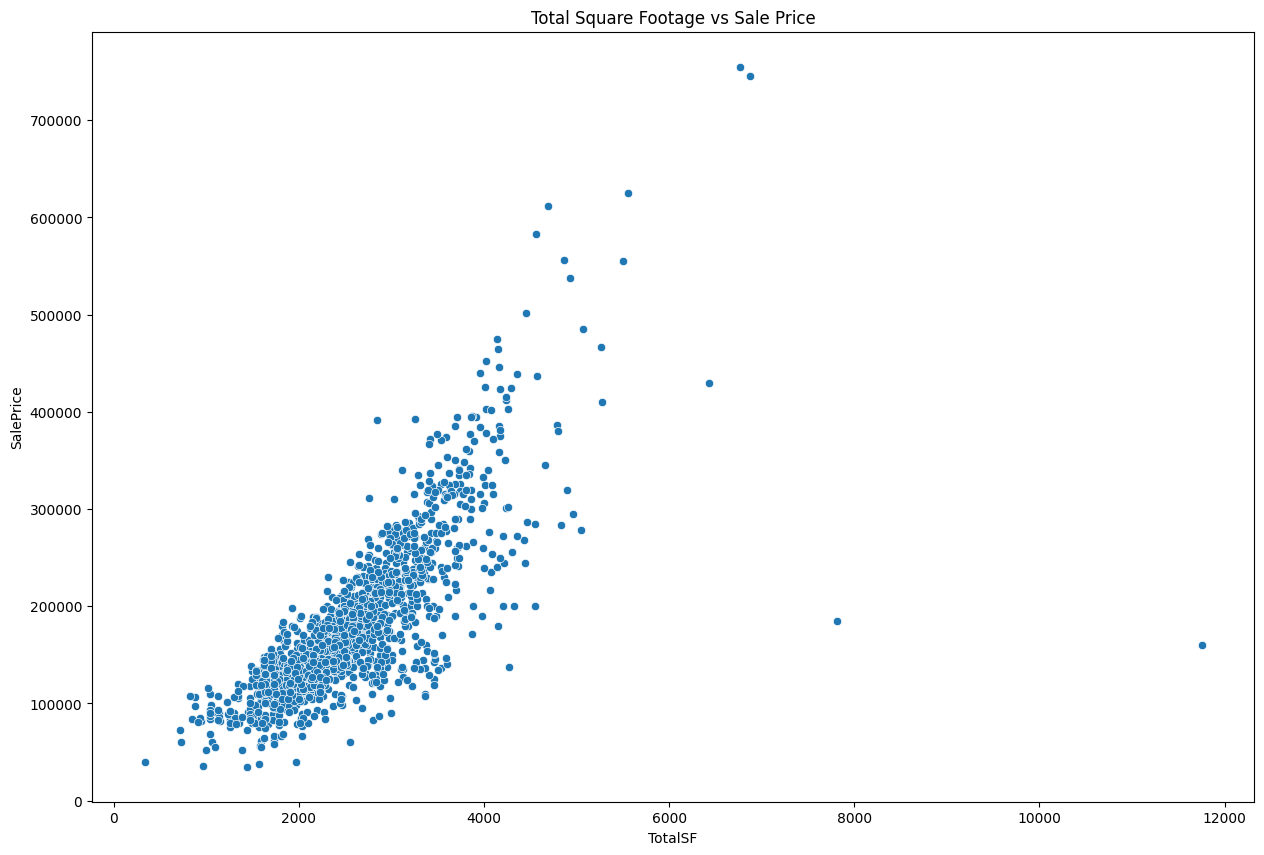

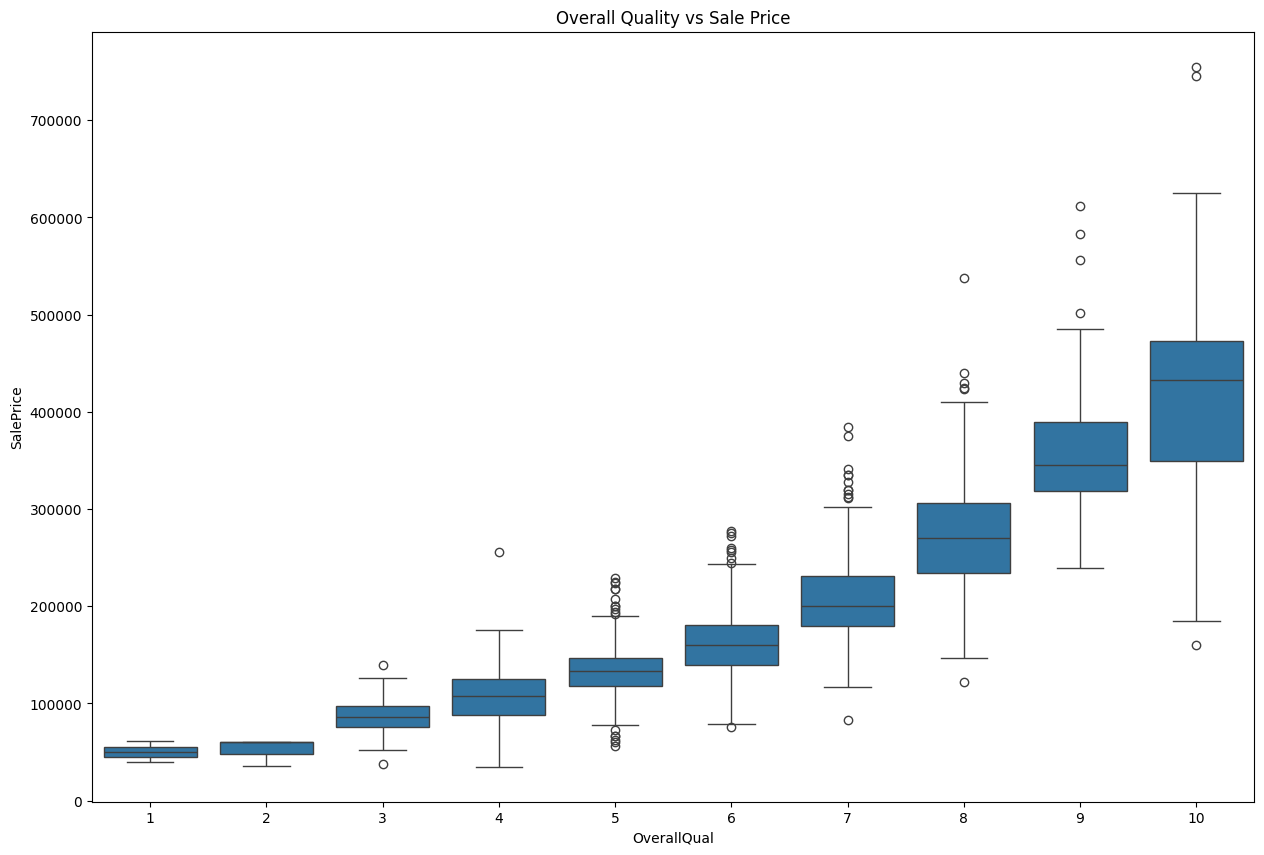

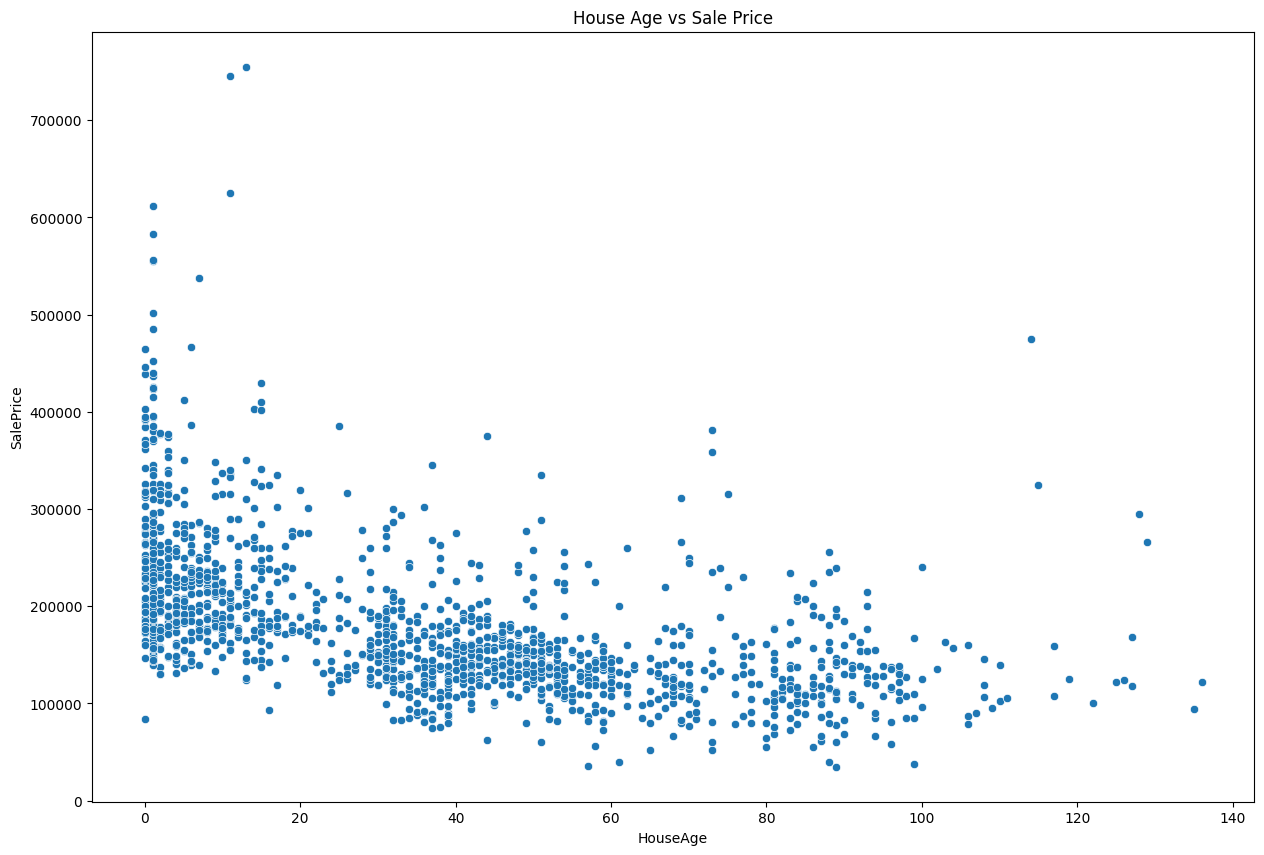

In [8]:
# Fitur teknik
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']

df = df.reset_index(drop=True)

# Visualisasi fitur penting
plt.figure(figsize=(15,10))
sns.scatterplot(x='TotalSF', y='SalePrice', data=df)
plt.title('Total Square Footage vs Sale Price')
plt.show()

plt.figure(figsize=(15,10))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Overall Quality vs Sale Price')
plt.show()

plt.figure(figsize=(15,10))
sns.scatterplot(x='HouseAge', y='SalePrice', data=df)
plt.title('House Age vs Sale Price')
plt.show()

### Pembuatan  dan Training Model Menggunakan Linear Regression
1. **Pengumpulan Data**
Proses dimulai dengan mengimpor dataset dari file CSV. Dataset ini berisi informasi yang akan digunakan untuk membangun model prediksi.
2. **Penanganan Missing Values**
Sebelum membangun model, penting untuk menangani nilai yang hilang (missing values) dalam dataset. Dalam hal ini, kolom yang memiliki lebih dari 30% nilai yang hilang dihapus. Untuk kolom yang masih memiliki nilai yang hilang setelah penghapusan, nilai-nilai tersebut diisi dengan median kolom tersebut. Penggunaan median sebagai pengganti nilai yang hilang adalah pilihan yang baik, terutama jika data memiliki outlier, karena median tidak terpengaruh oleh nilai ekstrem.
3. **Pemilihan Fitur**
Setelah menangani missing values, langkah selanjutnya adalah memilih fitur yang relevan untuk model. Dalam konteks ini, hanya kolom dengan tipe data numerik yang dipilih, karena model regresi linier memerlukan input numerik.
4. **Pemisahan Data**
Data kemudian dipisahkan menjadi dua bagian: fitur (X) dan target (y). Fitur adalah variabel independen yang digunakan untuk memprediksi, sedangkan target adalah variabel dependen yang ingin diprediksi (dalam hal ini, harga penjualan).

5. **Normalisasi Data**
Sebelum melatih model, fitur dinormalisasi menggunakan teknik StandardScaler. Normalisasi penting untuk memastikan bahwa semua fitur memiliki skala yang sama, yang membantu algoritma pembelajaran mesin dalam konvergensi dan meningkatkan kinerja model. Normalisasi ini mengubah data sehingga memiliki rata-rata 0 dan deviasi standar 1.

6. **Pembagian Data Train/Test**
Data dibagi menjadi dua set: satu untuk pelatihan (train) dan satu untuk validasi (test). Pembagian ini penting untuk mengevaluasi kinerja model pada data yang belum pernah dilihat sebelumnya, sehingga dapat menghindari overfitting.

7. **Pelatihan Model**
Model regresi linier dibangun dan dilatih menggunakan data pelatihan. Proses pelatihan melibatkan penyesuaian parameter model untuk meminimalkan kesalahan prediksi pada data pelatihan. Model regresi linier berusaha menemukan hubungan linear antara fitur dan target.

8. **Prediksi**
Setelah model dilatih, digunakan untuk memprediksi nilai target pada data validasi. Ini memberikan gambaran tentang seberapa baik model dapat menggeneralisasi pada data baru.

9. **Evaluasi Model**
- **Mean Squared Error (MSE)**
  - **Rumus**: $$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2\$$ di mana $y_i$ adalah nilai aktual, $hat{y}_i$ adalah nilai prediksi, dan $n$ adalah jumlah data.
  - **Fungsi**: `mean_squared_error(y_val, y_pred)`

-  **Root Mean Squared Error (RMSE)**
  - **Rumus**: $$RMSE = \sqrt{MSE}$$
  - **Fungsi**: `np.sqrt(MSE)`

- **R-squared (R²)**
  - **Rumus**: $$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$
  di mana $\bar{y}$ adalah rata-rata dari nilai aktual.
    - **Fungsi**: `r2_score(y_val, y_pred)`



---
Proses pembuatan model machine learning ini mencakup pengumpulan data, penanganan missing values, pemilihan fitur, normalisasi, pembagian data, pelatihan model, dan evaluasi. Setiap langkah penting untuk memastikan bahwa model yang dibangun dapat memberikan prediksi yang akurat dan dapat diandalkan.

In [46]:
# Import dataset
train_df = pd.read_csv('train.csv')

# Mengatasi missing values
missing_percent = train_df.isnull().mean() * 100

threshold = 30  # Hapus kolom dengan >30% missing
cols_to_drop = missing_percent[missing_percent > threshold].index
train_df = train_df.drop(columns=cols_to_drop)

# Pilih hanya kolom yang bertipe numerikal
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
train_df = train_df[numerical_cols]

# Isi sel yang memiliki missing values dengan median pada kolom tersebut
train_df = train_df.fillna(train_df.median())

# Split data
X = train_df.drop(['Id', 'SalePrice'], axis=1)
y = train_df['SalePrice']

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# --- METRIK EVALUASI ---
MSE = mean_squared_error(y_val, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_val, y_pred)

print("\nEvaluasi Model Linear Regression:")
print(f"Mean Squared Error (MSE): {MSE:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.2f}")
print(f"R-squared (R2): {R2:.4f}")


Evaluasi Model Linear Regression:
Mean Squared Error (MSE): 1356957853.32
Root Mean Squared Error (RMSE): 36836.91
R-squared (R2): 0.8231


### Aplikasi Mode pada Test Set
1. **Persiapan Data Uji**: Data uji (`test_df`) disesuaikan agar hanya berisi kolom yang sama dengan fitur yang digunakan untuk melatih model.

2. **Penanganan Missing Values**: Nilai yang hilang dalam data uji diisi dengan median kolom yang bersangkutan.

3. **Encoding Kategorikal**: Kolom kategorikal diubah menjadi variabel dummy (one-hot encoding) dan disesuaikan dengan kolom fitur pelatihan.

4. **Normalisasi Data Uji**: Data uji dinormalisasi menggunakan scaler yang telah dilatih sebelumnya untuk memastikan keselarasan skala.

5. **Prediksi**: Model yang telah dilatih digunakan untuk memprediksi nilai `SalePrice` pada data uji.

6. **Evaluasi**: Metrik evaluasi (MSE, RMSE, R²) dihitung, tetapi tidak valid karena tidak ada nilai aktual untuk dibandingkan. Rata-rata dan deviasi standar dari prediksi ditampilkan.

7. **Visualisasi**: Histogram distribusi prediksi `SalePrice` dibuat untuk memahami hasil prediksi.
---
Secara keseluruhan, kode ini menerapkan model pada data uji dan memberikan analisis dasar tentang hasil prediksi, meskipun evaluasi metrik tidak dapat dilakukan dengan benar tanpa nilai aktual.


Evaluasi Test Set (tanpa ground truth):
Prediksi SalePrice (rata-rata): 177184.79
Standard deviasi prediksi: 70489.80
Catatan: Karena data test tidak memiliki label SalePrice, tidak dapat dievaluasi langsung apakah overfitting. Bandingkan distribusi prediksi test vs train untuk indikasi.


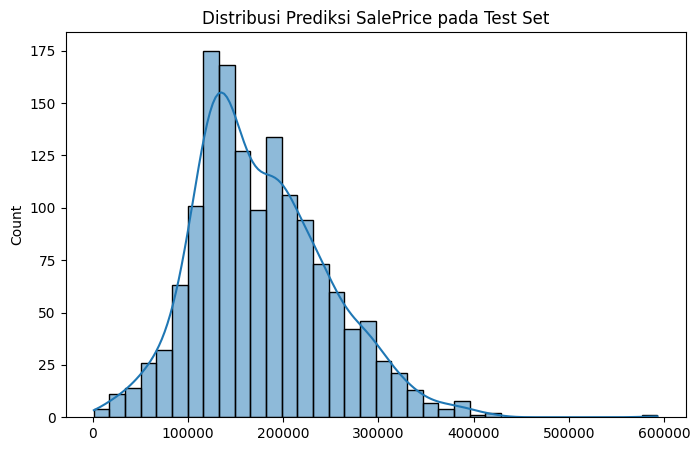

In [60]:
# Aplikasi mode machine learning
test_df = test_df[X.columns]  # pastikan hanya kolom yang sama
test_df = test_df.fillna(test_df.median(numeric_only=True))
test_encoded = pd.get_dummies(test_df)
test_encoded = test_encoded.reindex(columns=X.columns, fill_value=0)
test_scaled = scaler.transform(test_encoded)
y_test_pred = model.predict(test_scaled)

# Evaluasi pada test set
MSE_test = mean_squared_error(y_test_pred, y_test_pred)  # dummy karena target test tidak diketahui
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(y_test_pred, y_test_pred)

print("\nEvaluasi Test Set (tanpa ground truth):")
print(f"Prediksi SalePrice (rata-rata): {np.mean(y_test_pred):.2f}")
print(f"Standard deviasi prediksi: {np.std(y_test_pred):.2f}")

# Plot distribusi prediksi
plt.figure(figsize=(8,5))
sns.histplot(y_test_pred, kde=True)
plt.title('Distribusi Prediksi SalePrice pada Test Set')
plt.show()

### Membandingkan Distribusi Hasil Prediksi antara Train Set dengan Test Set
Karena data test tidak memiliki label `'SalePrice'`, tidak dapat dievaluasi langsung apakah overfitting. Bandingkan distribusi prediksi test vs train untuk indikasi.

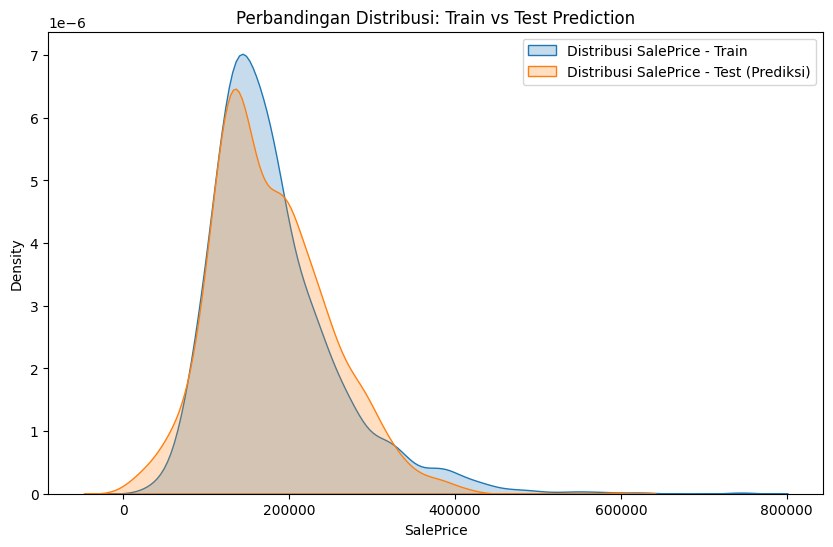

In [61]:
plt.figure(figsize=(10,6))
sns.kdeplot(y_train, label="Distribusi SalePrice - Train", fill=True)
sns.kdeplot(y_test_pred, label="Distribusi SalePrice - Test (Prediksi)", fill=True)
plt.title("Perbandingan Distribusi: Train vs Test Prediction")
plt.xlabel("SalePrice")
plt.legend()
plt.show()


Berdasarkan grafik distribusi yang Anda tampilkan, berikut adalah analisisnya:

### Observasi:
- Kurva distribusi **train** (`Distribusi SalePrice - Train`) dan **prediksi test** (`Distribusi SalePrice - Test (Prediksi)`) memiliki **bentuk yang sangat mirip**, baik dari segi:
  - **Puncak (mean/mode)**
  - **Sebaran (spread)**
  - **Skewness (kemiringan distribusi ke kanan)**
- Tidak ada indikasi perbedaan signifikan pada ekstrem (outlier) atau range nilai.

### Kesimpulan:
**Model *tidak mengalami overfitting***.

### Penjelasan:
Overfitting terjadi jika model belajar terlalu spesifik pada data latih, sehingga performanya buruk pada data yang belum pernah dilihat (test set). Dalam kasus ini:
- Distribusi prediksi test set mengikuti pola yang hampir identik dengan data latih.
- Ini menunjukkan bahwa model mampu **menggeneralisasi** pola dari data train ke data test dengan baik.

Jika Anda ingin konfirmasi lebih lanjut, bisa dilakukan evaluasi menggunakan cross-validation atau coba dengan model yang lebih kompleks dan bandingkan performanya. Namun dari grafik ini saja, **indikasi overfitting tidak ditemukan**.